In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
from glob import glob
import cv2
import matplotlib.pyplot as plt
import numpy as np
from tqdm.auto import tqdm
import keras
from keras.layers import Input, Dense, Conv2D, MaxPool2D, Flatten
from keras.models import Model
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [0]:
IMG_SIZE = 100
class_map = {'CLL':0, 'MCL': 1, 'FL': 2}

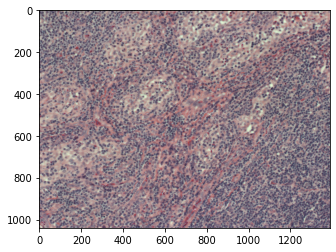

In [0]:
# Read single image
data_path = 'drive/My Drive/Day4/lymphoma/*/*.tif' 
img_paths = glob(data_path)
img_paths = np.random.choice(img_paths, 100) # demo for 100 images

img = cv2.imread(img_paths[0])
img = img[:,:,::-1] # BGR -> RGB
plt.imshow(img)

((1040, 1388, 3), (100, 100, 3))

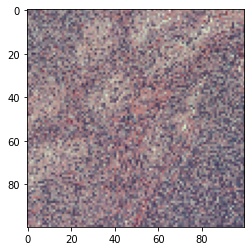

In [0]:
# Resize img
img_resized = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
plt.imshow(img_resized)
img.shape, img_resized.shape

In [0]:
# Extract img class
img_path = img_paths[0]
img_path

'drive/My Drive/class/緯育醫學影像/Day4/lymphoma/MCL/sj-05-3362-R2_010.tif'

In [0]:
cls = img_path.split('/')[-2]
cls

'MCL'

In [0]:
class_map[cls]

1

In [0]:
data_count = len(img_paths)
X = np.zeros((data_count, IMG_SIZE, IMG_SIZE, 3))
y = np.zeros((data_count, ))

In [0]:
for i, path in tqdm(enumerate(img_paths)):
    img = cv2.imread(path)
    img = img / 255. # normalize 0~255 -> 0~1
    img = img[:,:,::-1] #BGR -> RGB
    img_resize = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    cls = path.split('/')[-2]
    
    X[i] = img_resize
    y[i] = class_map[cls]

In [0]:
# label count
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))

{0.0: 32, 1.0: 29, 2.0: 39}

In [0]:
# X = X/255
y_onehot = keras.utils.to_categorical(y, num_classes=3)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=5566)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80, 100, 100, 3), (20, 100, 100, 3), (80, 3), (20, 3))

In [0]:
# 1
inputs = Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = Conv2D(filters=16, kernel_size=3, activation='relu')(inputs)
x = Conv2D(filters=17, kernel_size=3, activation='relu')(x)
x = MaxPool2D(2)(x)
x = Conv2D(filters=31, kernel_size=3, activation='relu')(x)
x = Conv2D(filters=32, kernel_size=3, activation='relu')(x)
x = MaxPool2D(2)(x)
x = Flatten()(x)
x = Dense(64, activation=keras.activations.relu)(x)
prediction = Dense(3, activation='softmax')(x)
model = Model(inputs=inputs, outputs=prediction)

In [0]:
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 98, 98, 16)        448       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 96, 96, 17)        2465      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 48, 48, 17)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 46, 46, 31)        4774      
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 44, 44, 32)        8960      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 22, 22, 32)        0   

In [0]:
keras.utils.plot_model(model, show_shapes=True)

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [0]:
logs = model.fit(X_train, y_train,
                batch_size=32,
                epochs=20,
                verbose=1,
                validation_data=(X_test, y_test))

Train on 80 samples, validate on 20 samples
Epoch 1/20
80/80 [==============================] - 7s 82ms/step - loss: 2.1327 - accuracy: 0.4000 - val_loss: 1.4618 - val_accuracy: 0.1000
Epoch 2/20
80/80 [==============================] - 0s 1ms/step - loss: 1.1495 - accuracy: 0.3375 - val_loss: 1.0809 - val_accuracy: 0.5500
Epoch 3/20
80/80 [==============================] - 0s 1ms/step - loss: 1.1024 - accuracy: 0.3125 - val_loss: 1.0760 - val_accuracy: 0.5500
Epoch 4/20
80/80 [==============================] - 0s 1ms/step - loss: 1.0864 - accuracy: 0.4000 - val_loss: 1.1664 - val_accuracy: 0.1000
Epoch 5/20
80/80 [==============================] - 0s 1ms/step - loss: 1.1008 - accuracy: 0.3375 - val_loss: 1.2063 - val_accuracy: 0.1000
Epoch 6/20
80/80 [==============================] - 0s 1ms/step - loss: 1.0706 - accuracy: 0.4500 - val_loss: 1.1126 - val_accuracy: 0.3500
Epoch 7/20
80/80 [==============================] - 0s 1ms/step - loss: 1.0676 - accuracy: 0.4125 - val_loss: 1.100

In [0]:
history = logs.history

Text(0.5, 1.0, 'acc')

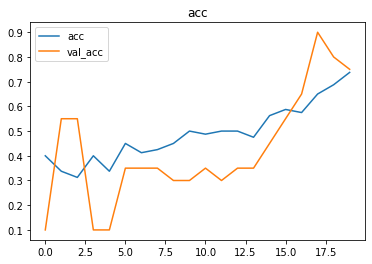

In [0]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.legend(['acc', 'val_acc'])
plt.title('acc')

Text(0.5, 1.0, 'loss')

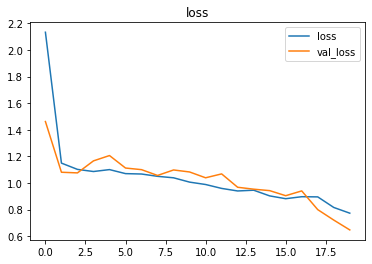

In [0]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('loss')

In [0]:
from sklearn.metrics import classification_report, confusion_matrix
y_true = np.argmax(y_test, axis=-1)
y_pred = np.argmax(model.predict(X_test), axis=-1)
print(y_true.shape, y_pred.shape)
target_names = [str(i) for i in range(3)]
print(classification_report(y_true, y_pred, target_names=target_names))
print(confusion_matrix(y_true, y_pred))


(20,) (20,)
              precision    recall  f1-score   support

           0       0.69      1.00      0.81        11
           1       0.00      0.00      0.00         2
           2       1.00      0.57      0.73         7

    accuracy                           0.75        20
   macro avg       0.56      0.52      0.51        20
weighted avg       0.73      0.75      0.70        20

[[11  0  0]
 [ 2  0  0]
 [ 3  0  4]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
